In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {'Model Name': ['KNN', 'DT', 'LR', 'FFNN', 'RFC'],
        'Accuracy': [73.799, 99.9814, 70.04, 71.01, 99.9876],
        'Precision': [77.0, 99.9956, 71.0, 71.65, 100.0],
        'F1-score': [81.0, 100.0, 83.0, 83.04, 100.0],
        'Recall': [86.0, 100.0, 99.0, 99.99, 100.0]}
results = pd.DataFrame(data)

In [3]:
print("Results Table:")
print(results)

Results Table:
  Model Name  Accuracy  Precision  F1-score  Recall
0        KNN   73.7990    77.0000     81.00   86.00
1         DT   99.9814    99.9956    100.00  100.00
2         LR   70.0400    71.0000     83.00   99.00
3       FFNN   71.0100    71.6500     83.04   99.99
4        RFC   99.9876   100.0000    100.00  100.00


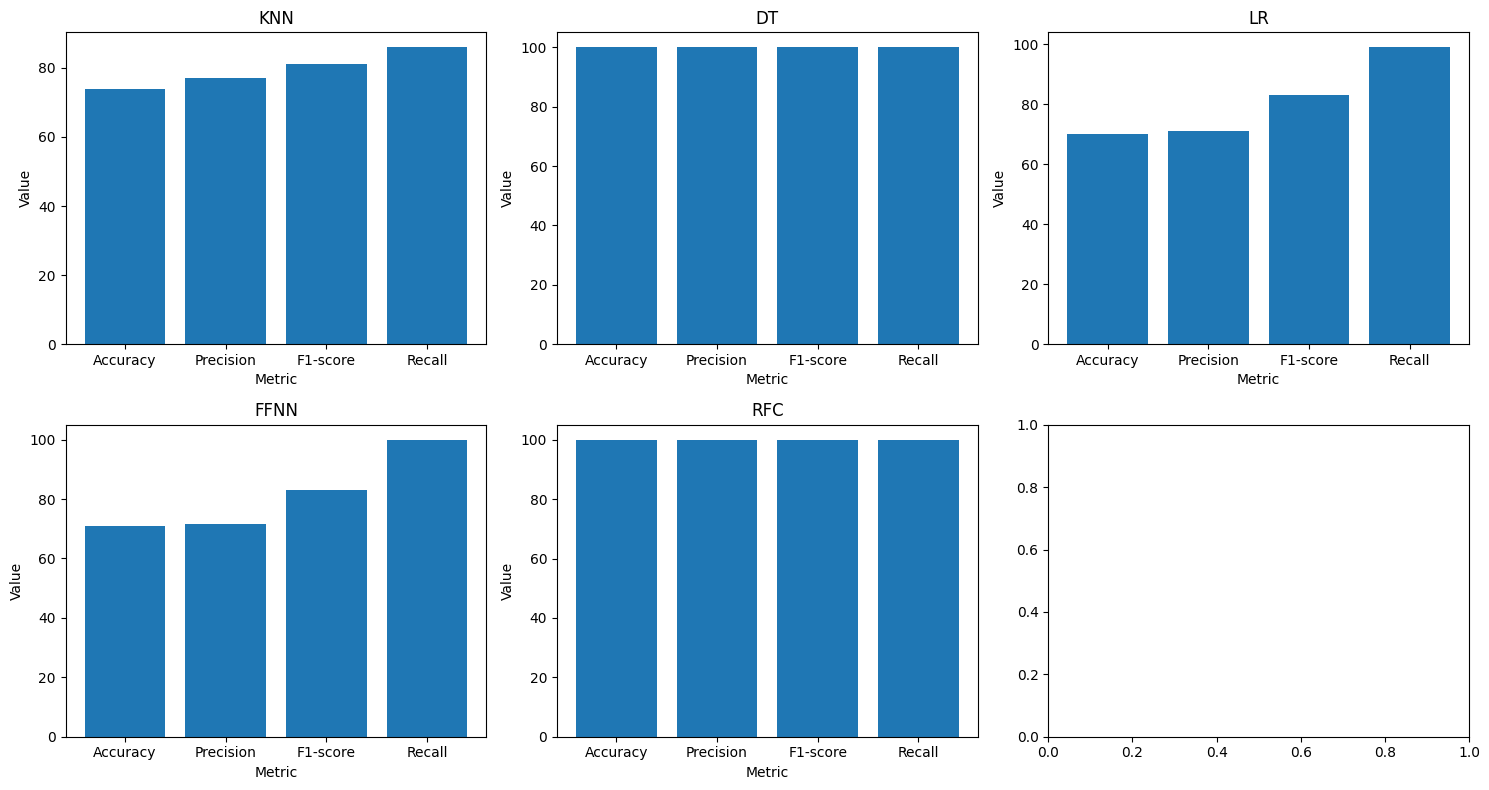

In [4]:
# Bar plot for each model with all four parameters
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()
for i, model in enumerate(results['Model Name']):
    axs[i].bar(results.columns[1:], results.iloc[i, 1:])
    axs[i].set_title(model)
    axs[i].set_xlabel('Metric')
    axs[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

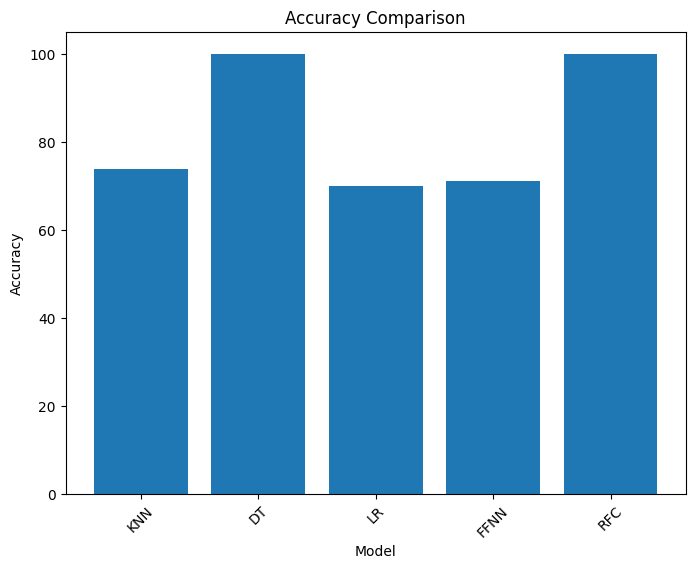

In [5]:
# Comparison of accuracy among all models
plt.figure(figsize=(8, 6))
plt.bar(results['Model Name'], results['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

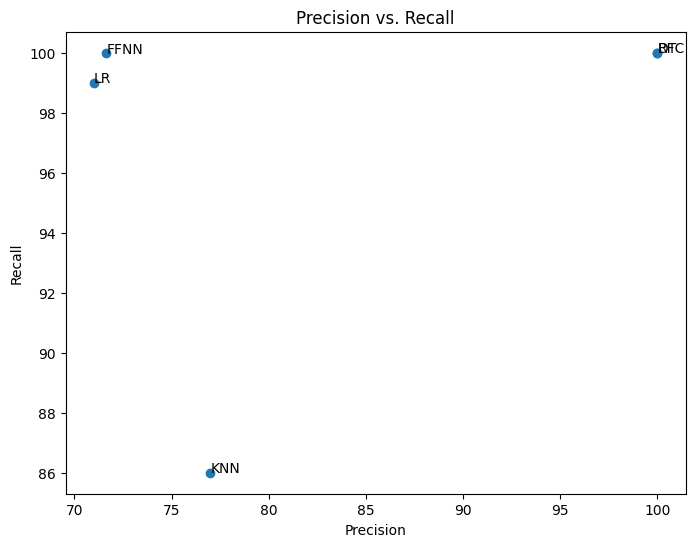

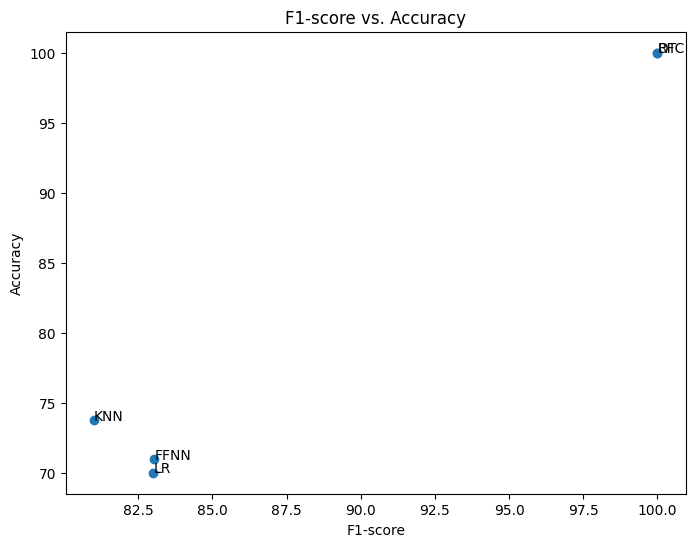

In [6]:
# Additional plots (e.g., precision vs. recall, F1-score vs. accuracy)
plt.figure(figsize=(8, 6))
plt.scatter(results['Precision'], results['Recall'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs. Recall')
for i, model in enumerate(results['Model Name']):
    plt.annotate(model, (results.iloc[i, 2], results.iloc[i, 4]))
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(results['F1-score'], results['Accuracy'])
plt.xlabel('F1-score')
plt.ylabel('Accuracy')
plt.title('F1-score vs. Accuracy')
for i, model in enumerate(results['Model Name']):
    plt.annotate(model, (results.iloc[i, 3], results.iloc[i, 1]))
plt.show()

In [7]:
import numpy as np

In [8]:
labels = np.array(results['Model Name'])
stats = np.array([results['Accuracy'], results['Precision'], results['F1-score'], results['Recall']]).T

# Set up the radar chart
angles = np.linspace(0, 2*np.pi, len(stats[0]), endpoint=False)
stats = np.concatenate((stats, stats[:, :1]), axis=1)
angles = np.concatenate((angles, [angles[0]]))

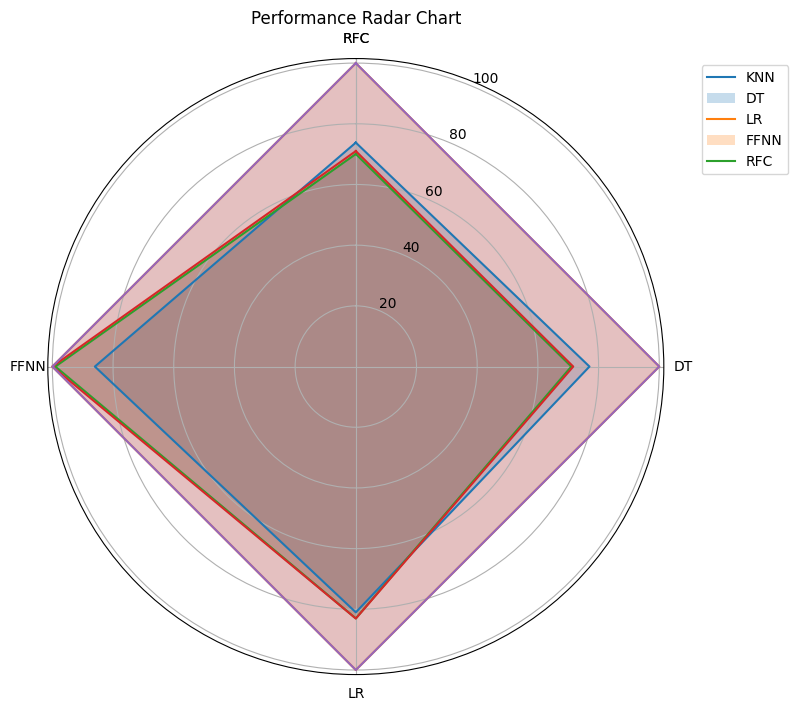

In [9]:
# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.set_theta_offset(np.pi/2)  # Rotate the chart by 90 degrees
ax.set_theta_direction(-1)    # Reverse the angle direction
ax.set_thetagrids(angles * 180/np.pi, labels)

for stat in stats:
    ax.plot(angles, stat)
    ax.fill(angles, stat, alpha=0.25)

ax.set_title('Performance Radar Chart')
ax.legend(results['Model Name'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [10]:
import seaborn as sns

# Create a pivot table for the heatmap
pivot_table = results.set_index('Model Name')[['Accuracy', 'Precision', 'F1-score', 'Recall']].transpose()


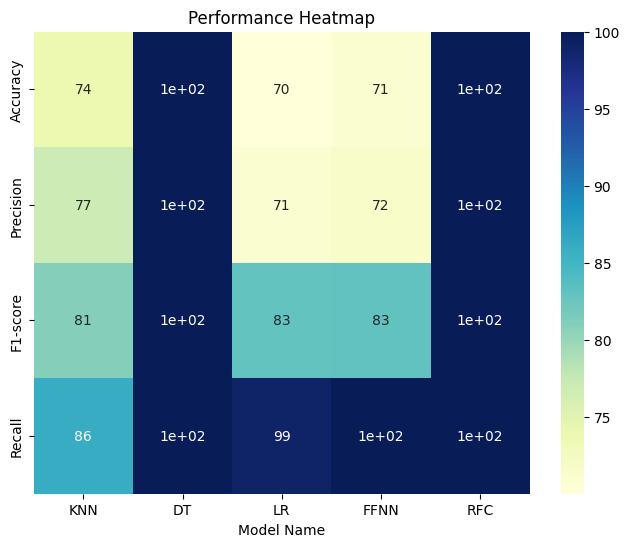

In [11]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Performance Heatmap')
plt.show()

In [12]:
from pandas.plotting import parallel_coordinates


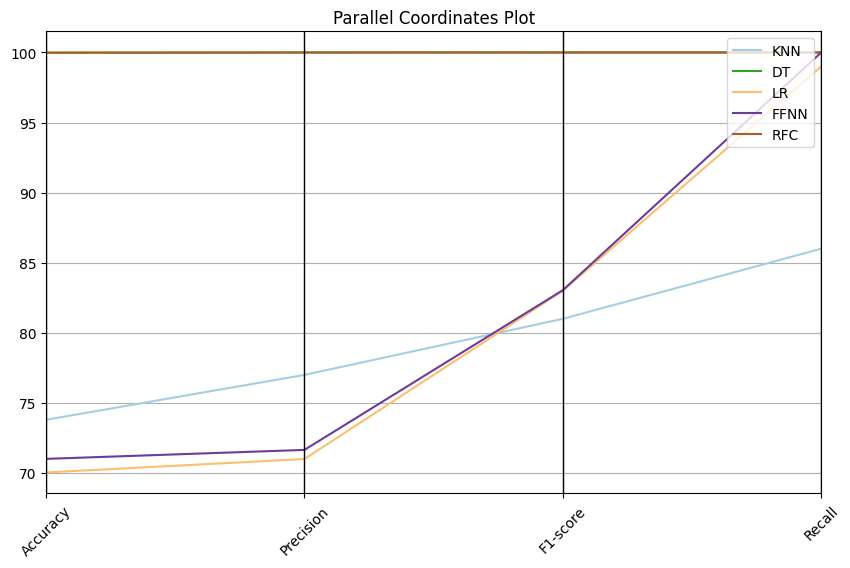

In [13]:
# Plot the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(results, 'Model Name', colormap='Paired')
plt.xticks(rotation=45)
plt.title('Parallel Coordinates Plot')
plt.show()